In [1]:
import graphlab as gl
gl.canvas.set_target('ipynb')
import matplotlib.pyplot as plt
from PodcastFeatureEngineering import Podcast_Features
%matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import imp
import os
from collections import Counter

2016-04-21 22:22:51,533 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: /tmp/graphlab_server_1461277370.log


This non-commercial license of GraphLab Create is assigned to crystal.humphries@systemsbiology.org and will expire on November 04, 2016. For commercial licensing options, visit https://dato.com/buy/.


In [2]:
loc = os.path.join('/home/ubuntu/PodcastRecommender/', "src/twitter_followers_list.py")
tweets = imp.load_source('get_twitter_followers', loc)
tweets = tweets.get_twitter_followers()
tweets.get_overlapping_users(Num=3)
item_sim_mat = tweets.Item_sim_matrix(max_num=20000)

In [3]:
sf = gl.SFrame(item_sim_mat)

In [6]:
(train_set, test_set) = sf.random_split(0.8, seed=1)

In [5]:
PF = Podcast_Features()
df = PF.cleaned_df

/home/ubuntu/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: DtypeWarning: Columns (14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
clean_podcast_csv.py:24: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  self.df['DateFirstEpisode'] = self.df.DateFirstEpisode.apply(lambda x: pd.to_datetime(str(x), coerce=True))


Creating Tf-idf


clean_podcast_csv.py:25: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  self.df['DateLastEpisode']  = self.df.DateLastEpisode.apply(lambda x: pd.to_datetime(str(x), coerce=True))


In [7]:
items = gl.load_sframe("../data/items_podcast_sframe.gl/")

In [ ]:
train_set.head(2)

In [ ]:
items.head(2)

In [8]:
item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
                                                   item_id="Title", item_data=items, verbose=False)
item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)

Recsys training: model = item_similarity

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 607840
 
 Data:
 +----------+--------+----------------+--------+-------+
 | user_id  | cutoff |   precision    | recall | count |
 +----------+--------+----------------+--------+-------+
 |  user_0  |   1    |      1.0       |  1.0   |   1   |
 |  user_0  |   2    |      0.5       |  1.0   |   1   |
 |  user_0  |   3    | 0.333333333333 |  1.0   |   1   |
 |  user_0  |   4    |      0.25      |  1.0   |   1   |
 |  user_0  |   5    |      0.2       |  1.0   |   1   |
 | user_100 |   1    |      0.0       |  0.0   |   1   |
 | user_100 |   2    |      0.0       |  0.0   |   1   |
 | user_100 |   3    |      0.0       |  0.0   |   1   |
 | user_100 |   4    |      0.0       |  0.0   |   1   |
 | user_100 |   5    |      0.0       |  0.0   |   1   |
 +----------+--------+----------------+--------+-------+
 [607840 rows x 5 columns]
 Note: Only the head of the SFrame is pr

In [ ]:
 0.409375881114 | 0.296451269988 |
 |   2    | 0.271976017116 | 0.355691085843 |
 |   3    | 0.201875286794 | 0.378739548183 |
 |   4    | 0.161075912627 | 0.392539963899 |
 |   5    | 0.134400344982
    
 0.41031356936  | 0.294388081934 |
 |   2    | 0.274200447486 | 0.353317653823 |
 |   3    | 0.204316377117 | 0.37535708372  |
 |   4    | 0.163587457226 | 0.388614710937 |
 |   5    | 0.137039352461 | 0.398395700281

In [18]:
items.shape

(16343, 5)

In [20]:
dates=[]
for a,b in  zip(PF.df.DateLastEpisode, PF.df.DateFirstEpisode):
    try:
        new = (a-b).days
    except:
        new = 'NaT'
    dates.append(new)
dates = np.array(dates)

In [46]:
items_reduced_sorted = items_reduced.sort("RatingCount", ascending=False)

In [49]:
#items_reduced_sorted['Title']

In [51]:
sum(df.Title=="Serial")

0

In [50]:
arr = gl.SArray(["Wait Wait... Don't Tell Me!"])
item_model.get_similar_items(arr, k=10)

Getting similar items completed in 0.008762

Title,similar,score,rank
Wait Wait... Don't TellMe! ...,Ask Me Another,0.1,1
Wait Wait... Don't TellMe! ...,On Point with TomAshbrook ...,0.0769230769231,2
Wait Wait... Don't TellMe! ...,Speech Path Podcast,0.0571428571429,3
Wait Wait... Don't TellMe! ...,One of These Things,0.04,4
Wait Wait... Don't TellMe! ...,Seth Rogen and EvanGoldberg: Meet the ...,0.0263157894737,5
Wait Wait... Don't TellMe! ...,Madcast Podcast,0.025641025641,6
Wait Wait... Don't TellMe! ...,The Splendid Table,0.025641025641,7
Wait Wait... Don't TellMe! ...,All Things Talk,0.025641025641,8
Wait Wait... Don't TellMe! ...,To Sense,0.0243902439024,9
Wait Wait... Don't TellMe! ...,Roleplay Tavern,0.0232558139535,10


In [ ]:
for col in items.column_names()[:-1]:
    cols = ['Title']
    cols.append(col)
    item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
                                                       item_id="Title", item_data=items[cols], verbose=False)
    results = item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)
    print "*****"
    print results['precision_recall_overall']

In [21]:
g = df.columns.to_series().groupby(df.dtypes).groups
c = g.keys()
df2 = df.drop(g[c[0]], axis=1)
df2 = df2.drop(g[c[1]], axis=1)

In [22]:
df2['Title'] = df.Title
df2['dates'] = dates

In [10]:
def get_top_100(col, df):
    tfidf = TfidfVectorizer( max_features=100, stop_words='english')
    X = tfidf.fit_transform(df[col])
    return pd.DataFrame(X.toarray(),
                        columns=pd.Series(tfidf.get_feature_names()))

In [24]:
unique_pod = item_sim_mat.Title.unique()

In [25]:
df_reduced = df2[ df2.Title.isin(unique_pod)]
print df_reduced.shape
items_reduced = gl.SFrame(df_reduced)

(29904, 6)


In [ ]:
items_reduced.head()

In [26]:
item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
                                                   item_id="Title", item_data=items_reduced, verbose=False)
item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)

Recsys training: model = item_similarity

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 607840
 
 Data:
 +----------+--------+----------------+--------+-------+
 | user_id  | cutoff |   precision    | recall | count |
 +----------+--------+----------------+--------+-------+
 |  user_0  |   1    |      1.0       |  1.0   |   1   |
 |  user_0  |   2    |      0.5       |  1.0   |   1   |
 |  user_0  |   3    | 0.333333333333 |  1.0   |   1   |
 |  user_0  |   4    |      0.25      |  1.0   |   1   |
 |  user_0  |   5    |      0.2       |  1.0   |   1   |
 | user_100 |   1    |      0.0       |  0.0   |   1   |
 | user_100 |   2    |      0.0       |  0.0   |   1   |
 | user_100 |   3    |      0.0       |  0.0   |   1   |
 | user_100 |   4    |      0.0       |  0.0   |   1   |
 | user_100 |   5    |      0.0       |  0.0   |   1   |
 +----------+--------+----------------+--------+-------+
 [607840 rows x 5 columns]
 Note: Only the head of the SFrame is pr

In [ ]:
iTunes_Summary = get_top_100("iTunesSummary", df)

In [ ]:
df3 = items_reduced.to_dataframe()

In [ ]:
df3['dates'] = df3['dates'].apply(lambda x: -1 if x=='NaT' else x)
df3['dates'] = df3['dates'].astype('int')

In [ ]:
for col in ['iTunesSummary', 'iTunesKeywords', 'Category']:
    y = get_top_100(col, df)
    df3 = pd.concat([df3, y], axis=1)

In [ ]:
#np.duplicates(df3.columns)
from collections import Counter

In [ ]:
ls = Counter(df3.columns)

In [ ]:
df_final = pd.DataFrame()
for a,b in ls.items():
    if b==1:
        df_final = pd.concat([df_final, df3[a]],axis=1)
    else:
        df_final[a] = df3[[a]].sum(axis=1)

In [ ]:
new_cols_items_reduced = df_final[ df_final.Title.isin(unique_pod)]
new_cols_items_reduced.shape
new_cols_items_reduced = gl.SFrame(new_cols_items_reduced)

In [ ]:
item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
                                                   item_id="Title", item_data=new_cols_items_reduced, verbose=False)
results = item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)
new_res = results['precision_recall_overall']

In [ ]:
item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
                                                   item_id="Title", verbose=False)
results = item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)
orig_res = results['precision_recall_overall']

In [ ]:
temp_items =new_cols_items_reduced.copy()
temp_items = temp_items.remove_column("Title")

In [ ]:
#precision1 = precision.append('Title')
item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
                                                       item_id="Title", item_data=new_cols_items_reduced[p],
                                                       verbose=False)
item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)

In [ ]:
len(train_set['user_id'].unique())

In [ ]:
train_set.shape

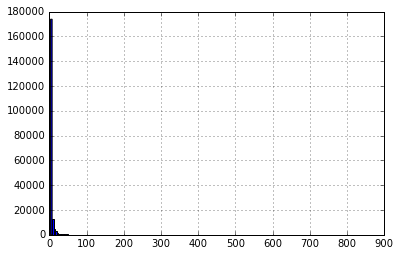

In [12]:
sf2 = remove_bots(sf)

In [ ]:
tr = pd.Series(sf['user_id'])
podcasts = tr.value_counts()
podcasts.hist(bins=200, title="main")

In [ ]:
fig = plt.figure()
plt.hist(podcasts, bins=200)
plt.title("Twitter Followers")
plt.xlim(0,100)
plt.xlabel("Podcasts")
plt.ylabel("Users")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import json

In [ ]:
plotly_key = json.load(open("/home/ubuntu/.api/plotly.api"))

In [ ]:
plotly_key['KEY']

In [ ]:
py.sign_in('Crystal.Humphries', str(plotly_key['KEY']))

In [ ]:
py.iplot_mpl(fig, strip_style = True, filename='data/TwitterFollowers')

In [ ]:
y = pd.Series(item_sim_mat['user_id']).value_counts()

In [ ]:
y[y<=100].describe()

In [ ]:
podcasts[podcasts<=100].describe()

In [ ]:
6 + 7

In [11]:
def remove_bots(sf, flag=True):
    tr = pd.Series(sf['user_id'])
    podcasts = tr.value_counts()
    if flag is True:
        podcasts.hist(bins=200)
    users_following100_lessPods = gl.SArray(podcasts.index[ podcasts <= 100].values)
    return sf.filter_by(users_following100_lessPods, 'user_id')

In [13]:
no_bots = pd.Series(sf2['user_id'])

In [14]:
no_bots = no_bots.value_counts()

In [15]:
no_bots.describe()

count    199282.000000
mean          5.328911
std           5.813819
min           3.000000
25%           3.000000
50%           4.000000
75%           5.000000
max         100.000000
dtype: float64

In [16]:
(train_set_2, test_set_2) = sf2.random_split(0.8, seed=1)

In [17]:
item_model = gl.item_similarity_recommender.create(train_set_2, user_id="user_id", 
                                                   item_id="Title", item_data=items, verbose=False)
item_model.evaluate_precision_recall(test_set_2, cutoffs=[1,2,3,4,5], verbose=False)

Recsys training: model = item_similarity

{'precision_recall_by_user': Columns:
 	user_id	str
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 602930
 
 Data:
 +---------+--------+----------------+--------+-------+
 | user_id | cutoff |   precision    | recall | count |
 +---------+--------+----------------+--------+-------+
 |  user_0 |   1    |      1.0       |  1.0   |   1   |
 |  user_0 |   2    |      0.5       |  1.0   |   1   |
 |  user_0 |   3    | 0.333333333333 |  1.0   |   1   |
 |  user_0 |   4    |      0.25      |  1.0   |   1   |
 |  user_0 |   5    |      0.2       |  1.0   |   1   |
 | user_10 |   1    |      0.0       |  0.0   |   1   |
 | user_10 |   2    |      0.0       |  0.0   |   1   |
 | user_10 |   3    |      0.0       |  0.0   |   1   |
 | user_10 |   4    |      0.0       |  0.0   |   1   |
 | user_10 |   5    |      0.2       |  1.0   |   1   |
 +---------+--------+----------------+--------+-------+
 [602930 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You ca

In [ ]:
new_cols_items_reduced_5min = df_final[ df_final['Title'].isin(sf2['Title'])]
new_cols_items_reduced_5min.shape

In [ ]:
reduced_podcast = new_cols_items_reduced_5min['Title'].unique()
check = pd.Series(sf2['Title']).unique()
len(check), len(reduced_podcast)

In [ ]:
sf3_reduced = sf2.filter_by(reduced_podcast, 'Title')

In [ ]:
(train_set_3, test_set_3) = sf3_reduced.random_split(0.8, seed=1)

In [ ]:
new_cols_items_reduced_5min = gl.SFrame(new_cols_items_reduced_5min)


### Q
    see if the recall/precision is due to podcasts not being in the data set. Reduced the podcasts to only be present in both the items and user info. 
    
### A
    made the precision worse!

In [ ]:
item_model = gl.item_similarity_recommender.create(train_set_3, user_id="user_id", 
                                                   item_id="Title", item_data=new_cols_items_reduced_5min, 
                                                   verbose=False)
item_model.evaluate_precision_recall(test_set_3, cutoffs=[1,2,3,4,5], verbose=False)

In [ ]:
item_model = gl.item_similarity_recommender.create(train_set_2, user_id="user_id", 
                                                   item_id="Title", item_data=new_cols_items_reduced[r], verbose=False)
item_model.evaluate_precision_recall(test_set_2, cutoffs=[1,2,3,4,5], verbose=False)

In [ ]:
p = [ x for x in precision]
#item_data=new_cols_items_reduced[precision]

In [ ]:
precision = precision[:-1]

In [ ]:
# precision = []
# prec_num  = []
# recall    = []
# recall_num= []

# for col in new_cols_items_reduced.column_names()[:-1]:
#     cols = ['Title']
#     if col == 'Title':
#         continue
#     cols.append(col)
#     item_model = gl.item_similarity_recommender.create(train_set, user_id="user_id", 
#                                                        item_id="Title", item_data=new_cols_items_reduced[cols],
#                                                        verbose=False)
#     new_res = item_model.evaluate_precision_recall(test_set, cutoffs=[1,2,3,4,5], verbose=False)
#     new_res = new_res['precision_recall_overall']
#     compare_p = sum(orig_res['precision']<new_res['precision'])
#     if compare_p>0:
#         precision.append(col)
#         prec_num.append(compare_p)
#         print "Precision" + str(col)
#     compare_r = sum(orig_res['recall']<new_res['recall'])
#     if compare_r>0:
#         recall.append(col)
#         recall_num.append(compare_r)
#         print "Recall" + str(col)

In [ ]:
r = [ r for r in recall]

In [ ]:
r.extend(precision)

In [ ]:
r = list(set(r))

In [ ]:
all_categories = df.Category.apply(lambda x: x.split('/'))
temp = [item for sublist in all_categories for item in sublist]
categories = {x:0 for x in temp}

cats = pd.DataFrame(0, index=np.arange(len(df.Category.values)), columns=categories.keys())
for i,v in enumerate(df.Category.values):
    ls = v.split('/')
    cats.loc[i][ls] = 1
cats.head()

In [ ]:
df_final.shape, cats.shape

In [ ]:
keep = cats.columns.tolist() + p

In [ ]:
df_final_cats = pd.concat([df_final, cats],axis=1)

In [ ]:
items_reduced_with_categories = df_final_cats[ df_final_cats.Title.isin(unique_pod)]
items_reduced_with_categories = gl.SFrame(items_reduced_with_categories)

In [ ]:
item_model = gl.item_similarity_recommender.create(train_set_2, user_id="user_id", 
                                                   item_id="Title", item_data=items_reduced_with_categories[keep], verbose=False)
item_model.evaluate_precision_recall(test_set_2, cutoffs=[1,2,3,4,5], verbose=False)

In [ ]:
keep = np.array(keep)

In [ ]:
keep = keep[np.where(keep!="<null>")]